In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #i % 50 means i  divided by 50
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | shangrao
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | quatre cocos
Processing Record 9 of Set 1 | tibu
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | mindif
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | borova
Processing Record 20 of Set 1 | okha
Processing Record 21 of Set 1 | verkhoyansk
Processing Record 22 of Set 1 | esperance
Processing Re

City not found. Skipping...
Processing Record 35 of Set 4 | poum
Processing Record 36 of Set 4 | staryy biser
City not found. Skipping...
Processing Record 37 of Set 4 | komsomolskiy
Processing Record 38 of Set 4 | meiganga
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | nur
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | peleduy
Processing Record 44 of Set 4 | seydi
Processing Record 45 of Set 4 | astara
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | kosh-agach
Processing Record 50 of Set 4 | grajau
Processing Record 1 of Set 5 | novyye burasy
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | weligama
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | ribeira grande
Processi

Processing Record 22 of Set 8 | mogochin
City not found. Skipping...
Processing Record 23 of Set 8 | morgan city
Processing Record 24 of Set 8 | lishu
Processing Record 25 of Set 8 | skjervoy
Processing Record 26 of Set 8 | broome
Processing Record 27 of Set 8 | solnechnyy
Processing Record 28 of Set 8 | dzerzhinsk
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | esna
Processing Record 32 of Set 8 | khash
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | kabalo
Processing Record 35 of Set 8 | samusu
City not found. Skipping...
Processing Record 36 of Set 8 | mortka
Processing Record 37 of Set 8 | tezu
Processing Record 38 of Set 8 | mehriz
Processing Record 39 of Set 8 | tagusao
Processing Record 40 of Set 8 | les cayes
Processing Record 41 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 42 of Set 8 | beidao
Processing Record 43 of Set 8 | svetlogorsk
Proce

Processing Record 15 of Set 12 | maningrida
Processing Record 16 of Set 12 | nsunga
Processing Record 17 of Set 12 | dunedin
Processing Record 18 of Set 12 | olinda
Processing Record 19 of Set 12 | eyrarbakki
Processing Record 20 of Set 12 | yeniseysk
Processing Record 21 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 22 of Set 12 | lata
Processing Record 23 of Set 12 | urusha
Processing Record 24 of Set 12 | akersberga
Processing Record 25 of Set 12 | constantine
Processing Record 26 of Set 12 | vangazi
Processing Record 27 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 28 of Set 12 | shagonar
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | naron
Processing Record 31 of Set 12 | ambon
Processing Record 32 of Set 12 | mashhad
Processing Record 33 of Set 12 | selenduma
Processing Record 34 of Set 12 | port-gentil
Processing Record 35 of Set 12 | gorom-gorom
Processing Record 36 of Set 12 | darnah
Proce

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.82,72,93,18.70,PF,2022-08-04 01:57:40
1,Bethel,41.3712,-73.4140,76.77,80,1,1.01,US,2022-08-04 02:01:23
2,Ushuaia,-54.8000,-68.3000,37.36,97,100,5.37,AR,2022-08-04 02:00:29
3,Yellowknife,62.4560,-114.3525,64.56,39,27,8.01,CA,2022-08-04 02:01:10
4,New Norfolk,-42.7826,147.0587,61.92,51,3,9.17,AU,2022-08-04 01:57:43
5,Shangrao,28.4532,117.9686,92.97,52,6,3.24,CN,2022-08-04 02:01:24
6,Cape Town,-33.9258,18.4232,55.81,82,75,10.36,ZA,2022-08-04 01:57:35
7,Quatre Cocos,-20.2078,57.7625,68.11,65,100,13.11,MU,2022-08-04 01:59:46
8,Tibu,8.6390,-72.7358,73.18,98,97,1.77,CO,2022-08-04 02:01:24
9,Atuona,-9.8000,-139.0333,77.09,82,30,16.67,PF,2022-08-04 01:58:29


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659650862.6689966

In [21]:
today = time.strftime("%x")
today

'08/04/22'

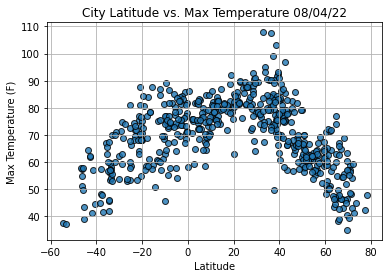

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

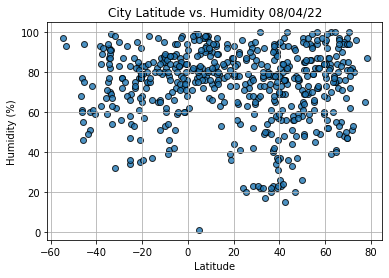

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

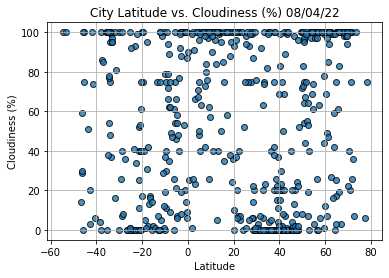

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

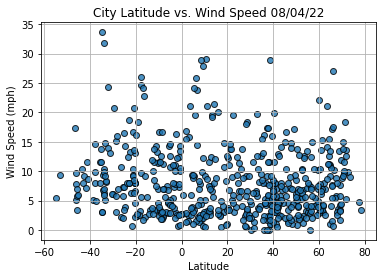

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Lat                        42.097
Lng                      -79.2353
Max Temp                    77.05
Humidity                       48
Cloudiness                    100
Wind Speed                   3.96
Country                        US
Date          2022-08-04 01:56:47
Name: 13, dtype: object

In [30]:
#we want cities in the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bethel,41.3712,-73.4140,76.77,80,1,1.01,US,2022-08-04 02:01:23
3,Yellowknife,62.4560,-114.3525,64.56,39,27,8.01,CA,2022-08-04 02:01:10
5,Shangrao,28.4532,117.9686,92.97,52,6,3.24,CN,2022-08-04 02:01:24
8,Tibu,8.6390,-72.7358,73.18,98,97,1.77,CO,2022-08-04 02:01:24
10,San Cristobal,7.7669,-72.2250,64.33,93,84,1.43,VE,2022-08-04 02:01:25


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

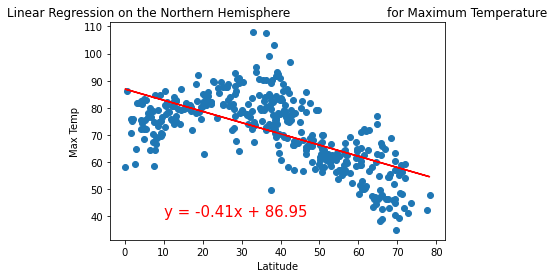

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

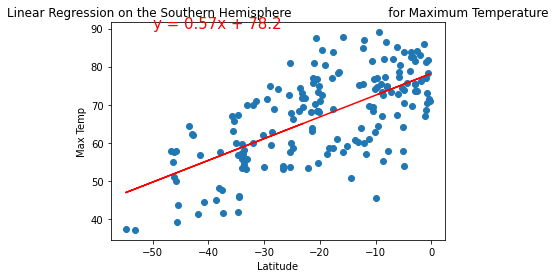

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

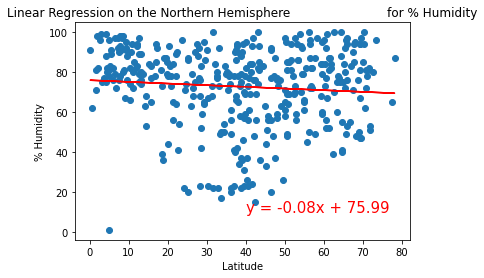

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

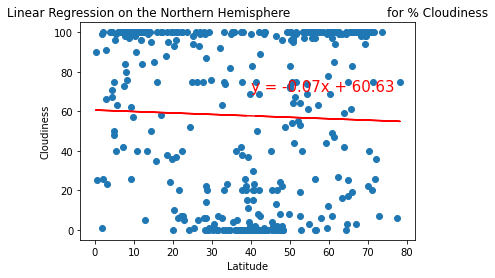

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', "Cloudiness",(40,70))

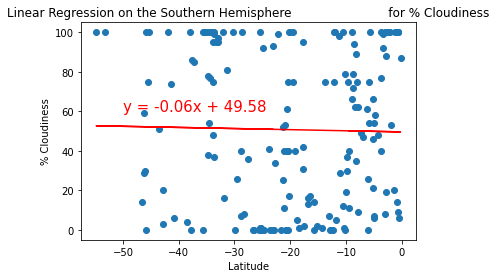

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

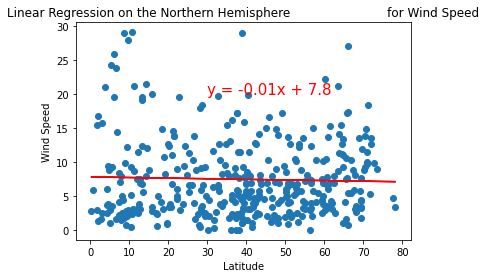

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,20))

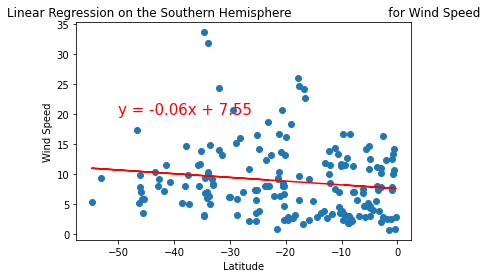

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))